# <center>Предсказание продолжительности жизни</center>
## Знакомство с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [2]:
sns.set_style('darkgrid')
plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
pio.renderers.default = 'png'

In [3]:
data_original = pd.read_csv('data/Life Expectancy Data.csv')
data = data_original.copy()
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


**Факторы**:
* Country - страна
* Year - год
* Status - тип страны(развивающаяся ли)
* Adult Mortality - смертность взрослого населения
* infant deaths - смертность младенцев
* Alcohol - доля пьющего населения
* percentage expenditure - процент расходов населения
* Hepatitis B - процент населения, имеющего гепатит В
* Measles - процент населения, болеющего корью
* BMI - индекс массы тела
* under-five deaths - смертоность до 5 лет
* Polio - полиомиелит
* Total expenditure - общая сумма расходов
* Diphtheria - дифтерия
* HIV/AIDS - ВИЧ/СПИД
* GDP - ВВП
* Population - размер населения
* thinness  1-19 years - худоба в 1-19 лет
* thinness 5-9 years - худоба в 5-9 лет
* Income composition of resources - доходная структура ресурсов
* Schooling - образование

**Целевой признак**:
* Life expectancy - средняя продолжительность жизни

**Тип данных в признаках**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

**Статистические показатели непрерывных числовых признаков**

In [5]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


**Статистические показатели категориальных признаков**

In [6]:
data.describe(include='object')

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


**Количество пропусков в признаках**

In [7]:
data.isnull().sum().reset_index()

,index,0
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,10
4,Adult Mortality,10
5,infant deaths,0
6,Alcohol,194
7,percentage expenditure,0
8,Hepatitis B,553
9,Measles,0


**Количество дубликатов**

In [8]:
data.duplicated().sum()

0

## Очистка данных

**Уберём лишние пробелы из названия признаков**

In [9]:
for feature in data.columns:
    if feature[0] == ' ':
        cleaned_feature = feature[1:]
        data.rename({feature: cleaned_feature}, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

**Заполняем пропуски в данных**

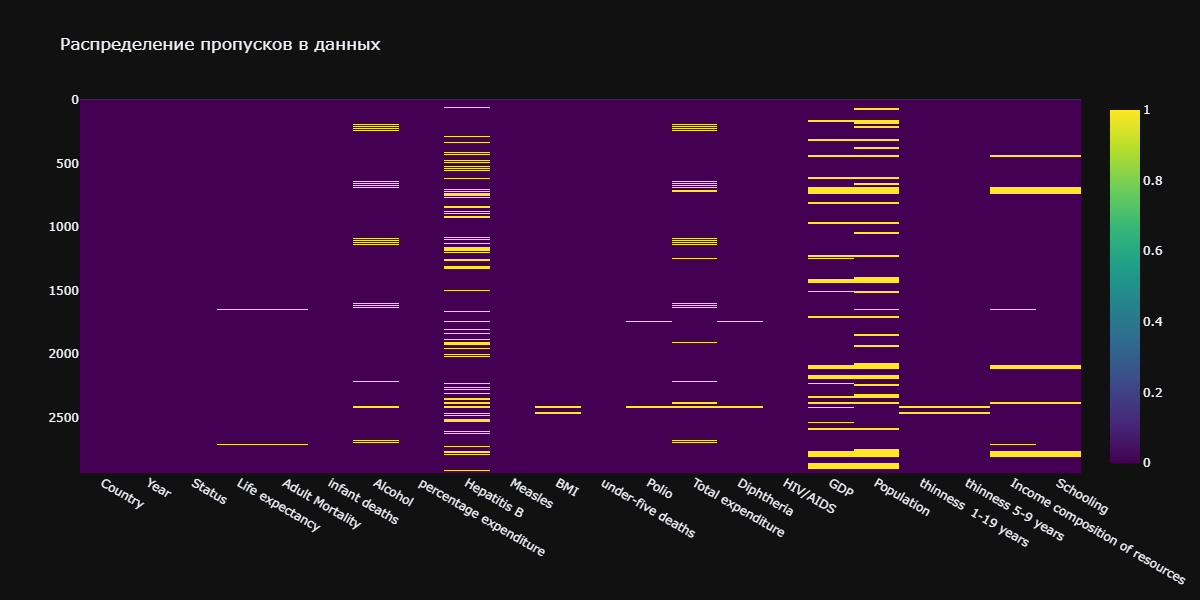

In [10]:
px.imshow(
    data.isnull(), 
    color_continuous_scale='viridis',
    height=600,
    width=1200,
    title='Распределение пропусков в данных',
    zmax=1,
    template="plotly_dark"
)

**Создадим таблицу, в которой будет показано процентное соотношение пропусков к общему числу строк.**

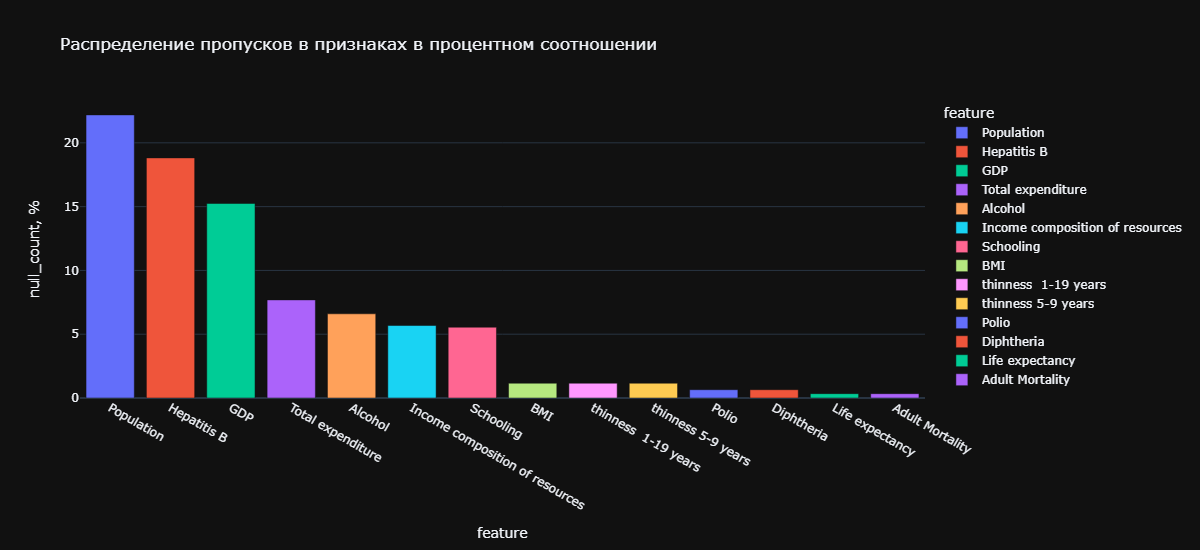

In [11]:
null_df = data.isnull().sum().reset_index().rename({0: 'null_count, %', 'index': 'feature'}, axis=1)
null_df['null_count, %'] = (null_df['null_count, %'] / data.shape[0] * 100).round(2)
null_df = null_df[null_df['null_count, %'] > 0].reset_index().drop(columns='index').sort_values(by='null_count, %', ascending=False)

px.bar(
    null_df,
    x='feature',
    y='null_count, %',
    color='feature',
    width=1200,
    height=550,
    title='Распределение пропусков в признаках в процентном соотношении',
    template="plotly_dark"
)

**Заполним пока что все пропущенные значения медианой**

In [12]:
values = dict()
for col in data[[col for col in data.columns if data[col].dtype != 'object']].columns:
    values[col] = data[col].median()
data.fillna(value=values, inplace=True)
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

## Визуализация распределений и зависимостей в данных

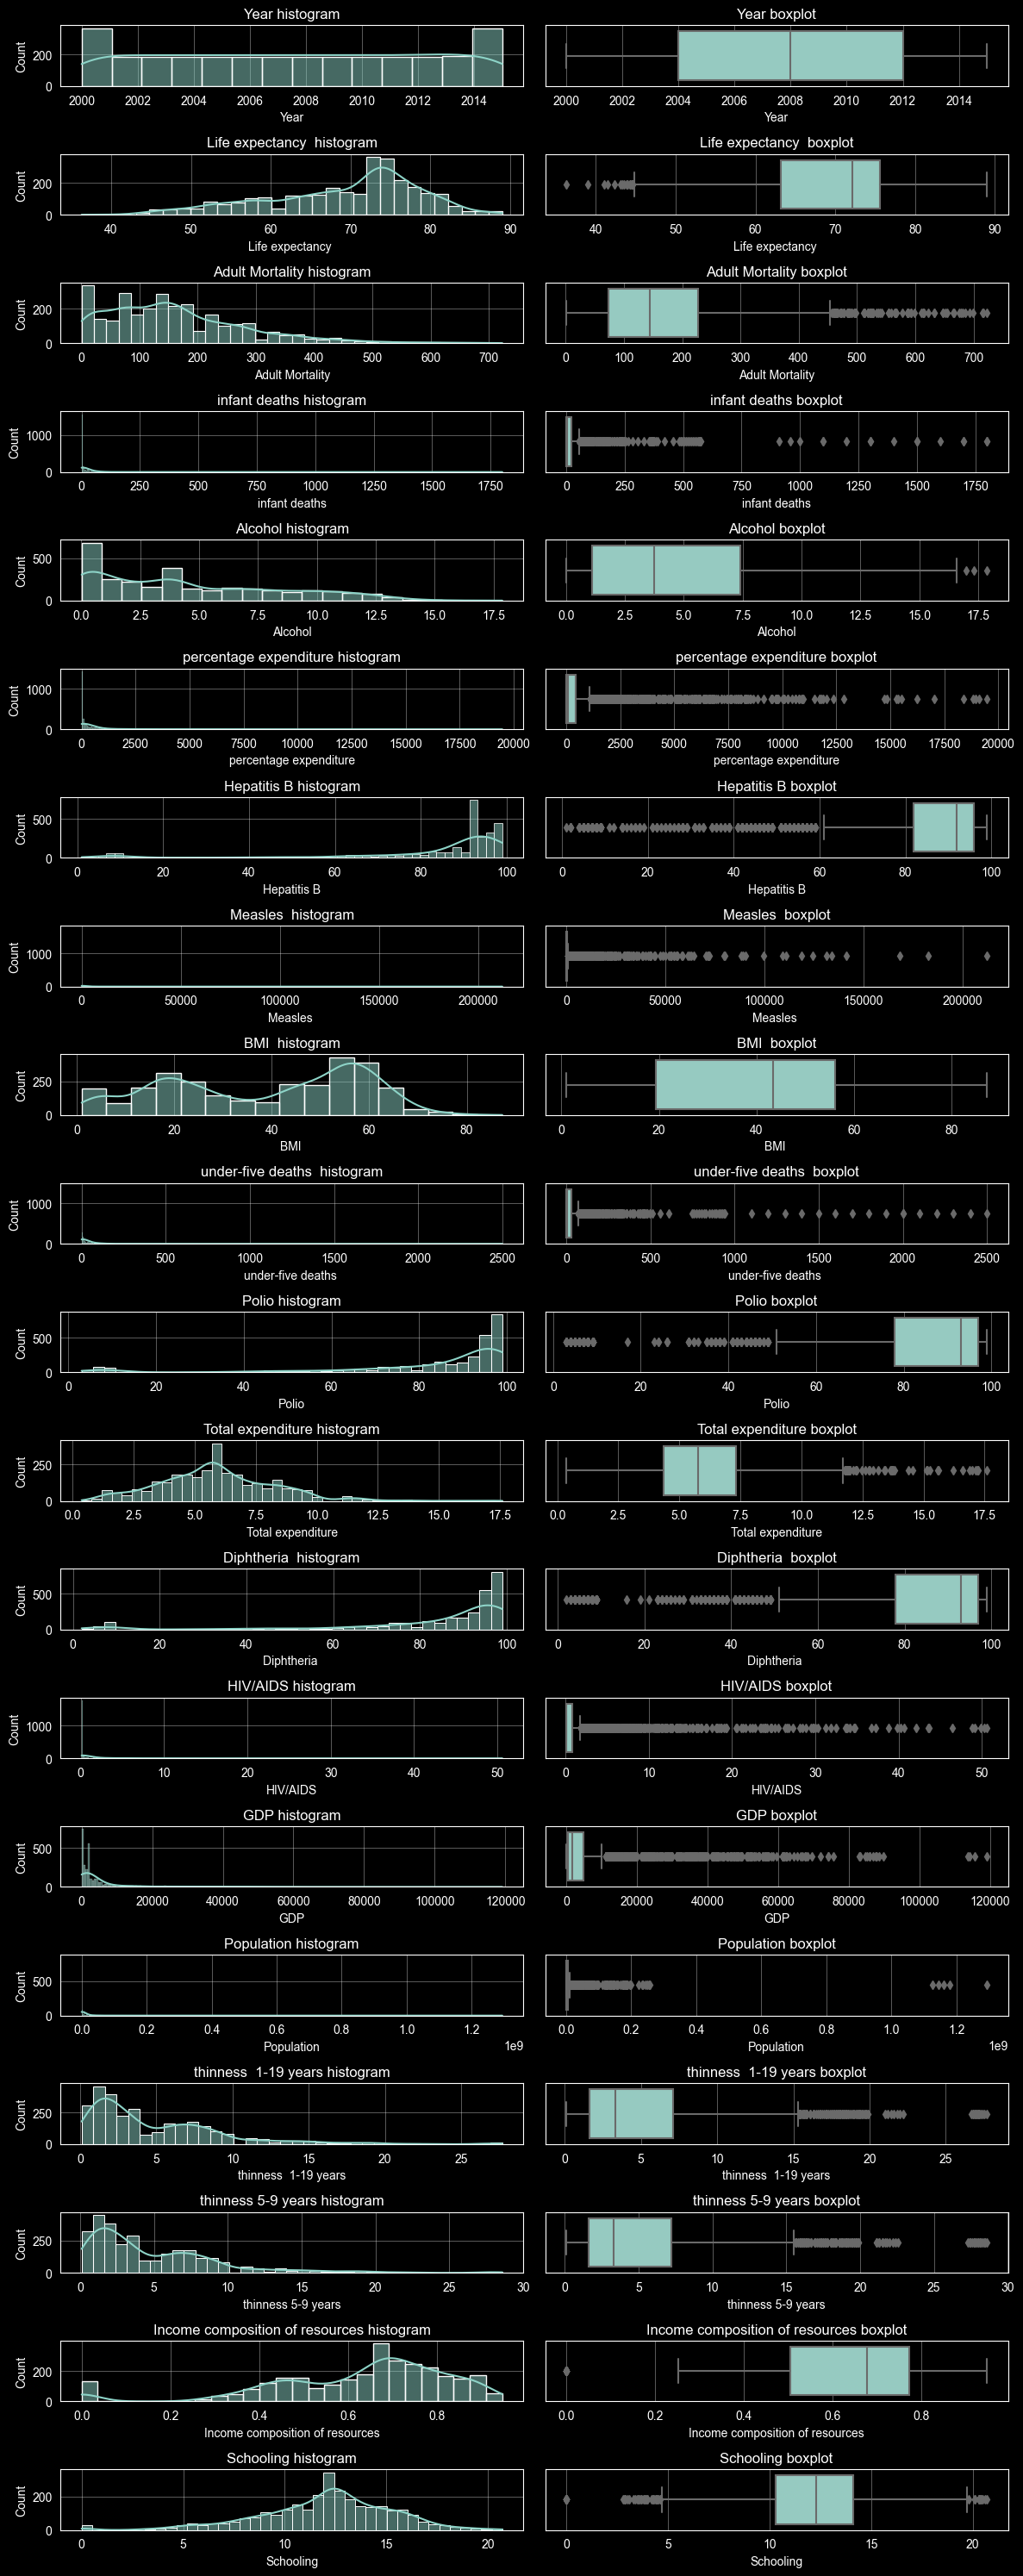

In [13]:
def make_histbox(data, features:list):
    fig, axs = plt.subplots(len(features), 2, figsize=(12, 30))
    for feature, row in zip(features, range(len(features))):
        ax, ay = axs[row, 0], axs[row, 1]
        sns.histplot(data, x=feature, ax=ax, kde=True)
        sns.boxplot(data, x=feature, ax=ay)
        ax.set_title(feature + ' histogram')
        ay.set_title(feature + ' boxplot')
    fig.tight_layout()
make_histbox(data, data[[col for col in data.columns if data[col].dtype != 'object']].columns)

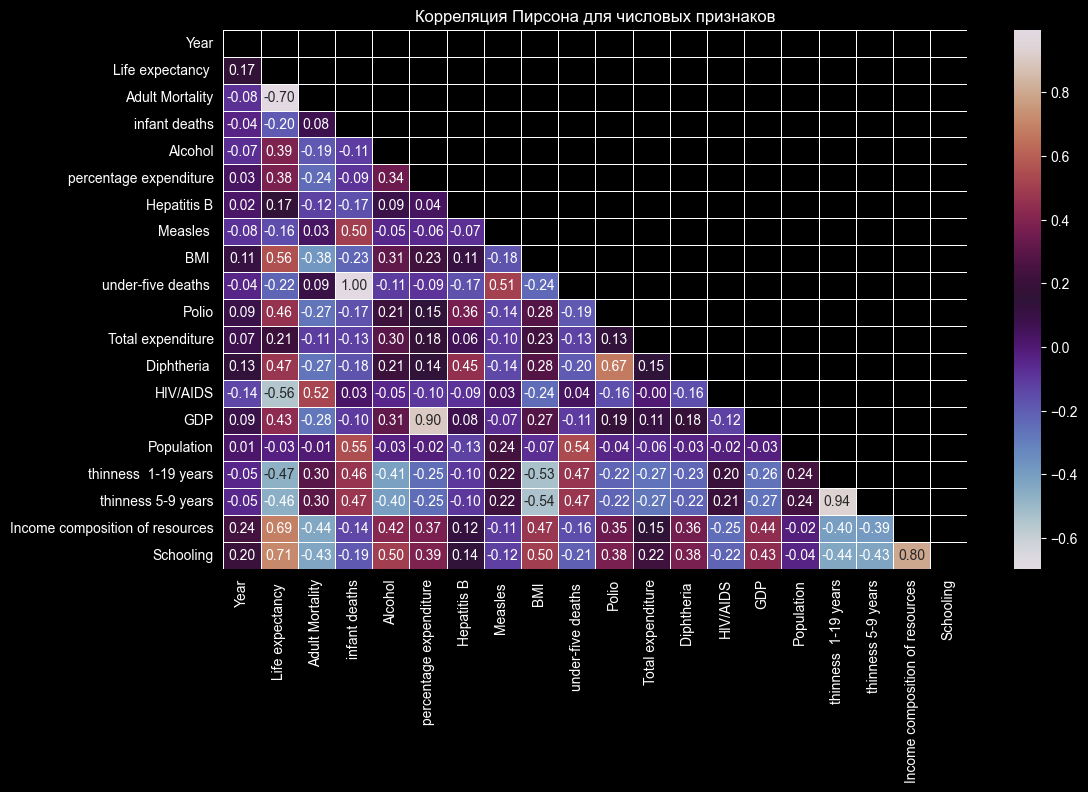

In [14]:
mask = np.triu(data.corr(numeric_only=True))
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(data.corr(numeric_only=True), mask=mask, annot=True, cmap='twilight', fmt='.2f', ax=ax, linewidths=0.5)
ax.set_title('Корреляция Пирсона для числовых признаков');

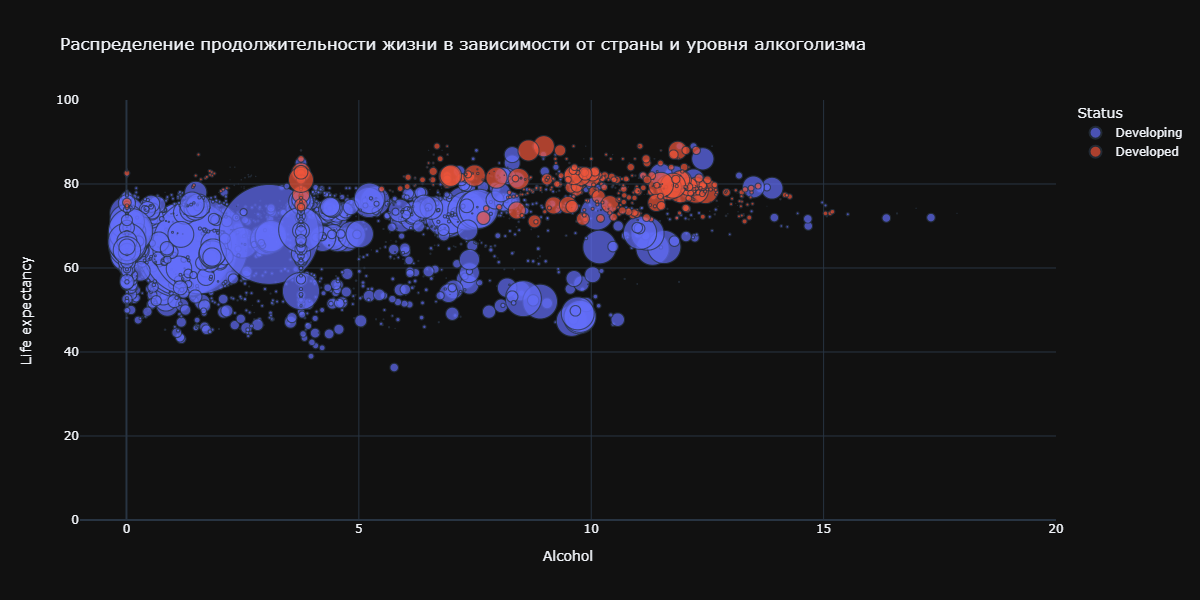

In [15]:
px.scatter(
    data.sort_values('Year'),
    y='Life expectancy ',
    x='Alcohol',
    color='Status',
    size='Population',
    size_max=100,
    hover_name='Country',
    range_y=[0, 100],
    range_x=[-1, 20],
    width=1200,
    height=600,
    title='Распределение продолжительности жизни в зависимости от страны и уровня алкоголизма',
    template="plotly_dark"
)

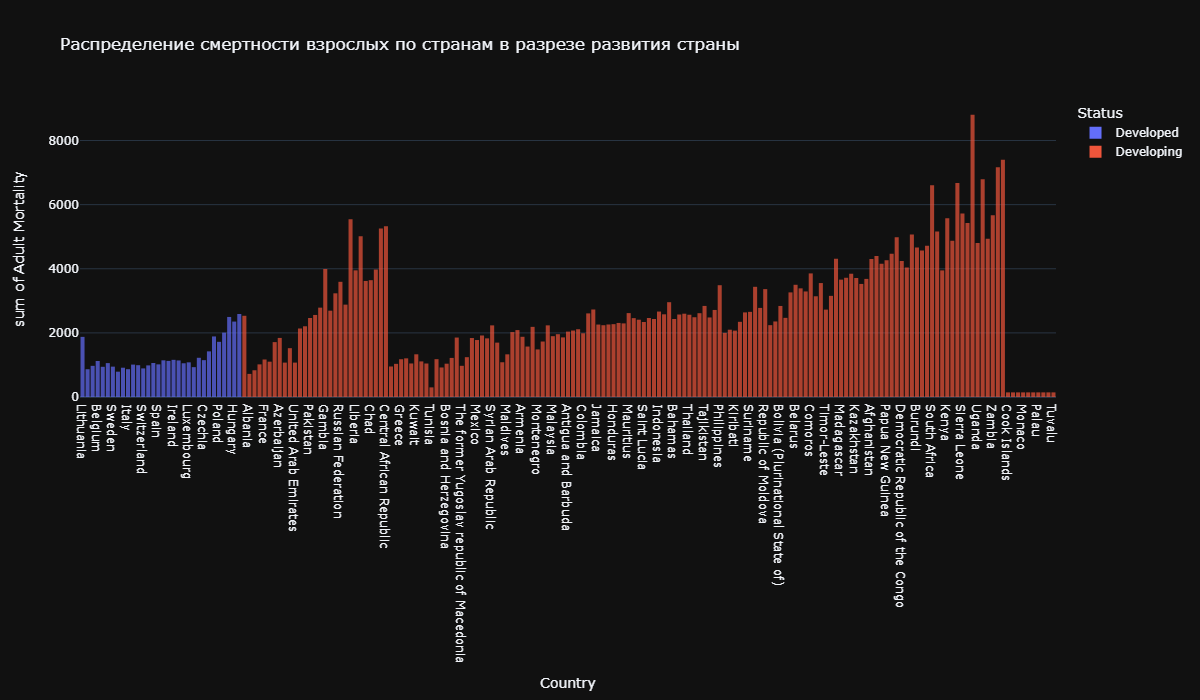

In [16]:
px.histogram(
    data.sort_values(by=['Year', 'Adult Mortality']),
    x='Country',
    y='Adult Mortality',
    color='Status',
    height=700,
    width=1200,
    title='Распределение смертности взрослых по странам в разрезе развития страны',
    opacity=0.7,
    template="plotly_dark"
)

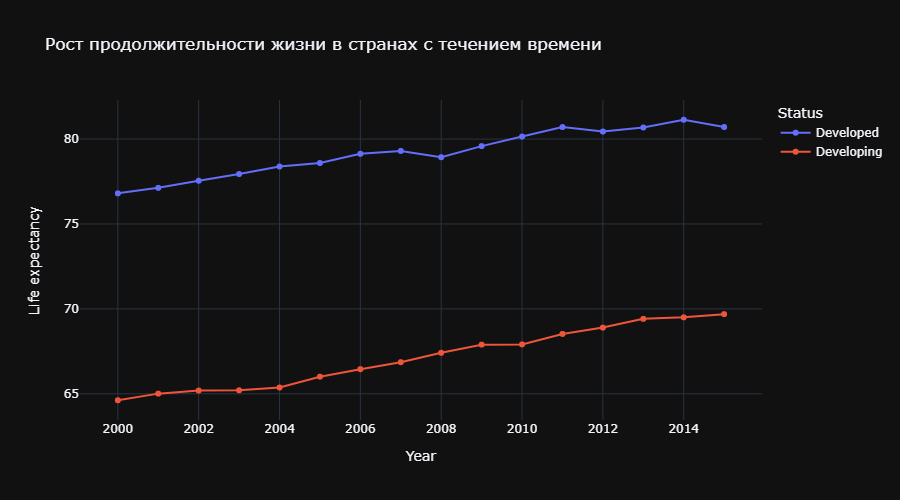

In [17]:
grouped_by_year = data.groupby(['Year', 'Status'], as_index=False)['Life expectancy '].mean()
px.line(
    grouped_by_year,
    x='Year',
    y='Life expectancy ',
    color='Status',
    markers=True,
    width=900,
    height=500,
    title='Рост продолжительности жизни в странах с течением времени',
    template="plotly_dark"
)

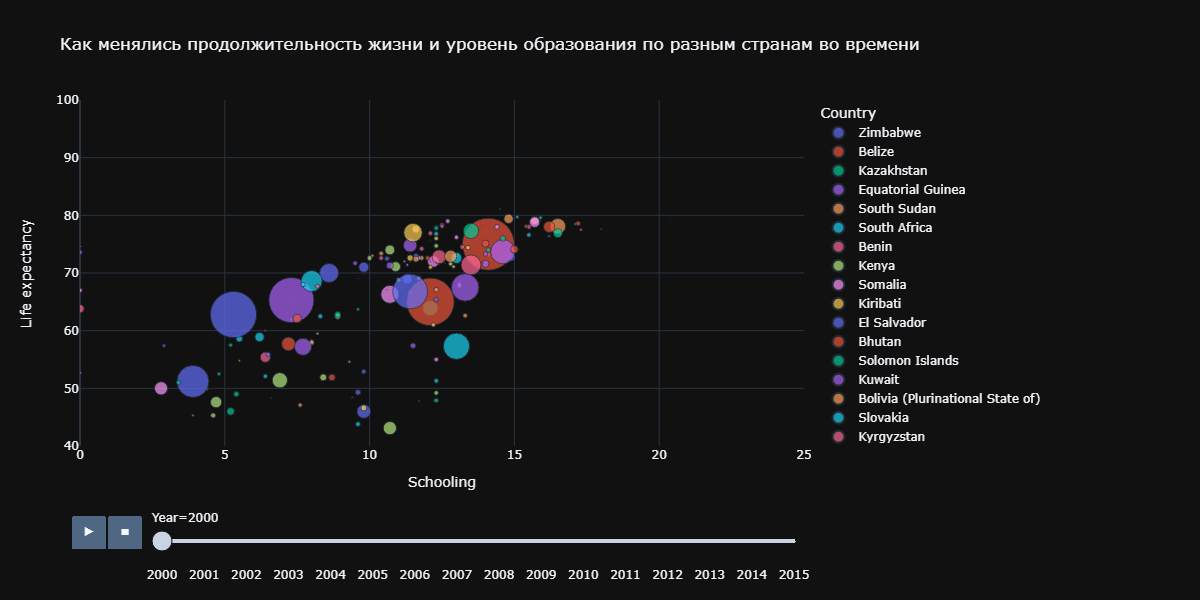

In [18]:
px.scatter(
    data.sort_values(by='Year'),
    x='Schooling',
    y='Life expectancy ',
    color='Country',
    size='Population',
    size_max=100,
    hover_name='Status',
    animation_frame='Year',
    range_x=[0, 25],
    range_y=[40, 100],
    width=1200,
    height=600,
    title='Как менялись продолжительность жизни и уровень образования по разным странам во времени',
    template="plotly_dark"
)

## EDA